In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

### Introduction & Data Background
Currently working on the COPDGene project, which, per the revised COPDGene Study Design is "an observational study designed to identify genetic factors associated with COPD... The study goals were to characterize smokers with and without COPD, using spirometry, six minute walk, medical history, respiratory symptoms (modified ATS respiratory questionnaire), respiratory medications, quality of life and inspiratory and expiratory chest CT scans, and to perform epidemiological and genetic studies of these COPD-related phenotypes."

### Problem of Interest - Ohmics
#### Data Description:  
Data includes: 
1. Measures of COPD severity - FEV1 - Forced Expiratory Volume (Response Variables(y) )   
2. Counts of over 5000 proteins which are made available through a blood panel administered to COPDGene study participants. The proteins are the predictor variables, or features. The study had around 5000 participants.
3. Goal - To find meaningful associations between proteins in data set and the FEV1 score, and construct a predictive model. Possibly screen for associated proteins to use in more complex models.
### Data Issues
1. Method in which the data was collected was not designed specifically for COPD. Thus, it is not known beforehand whether there is a correlation between some of the proteins in the panel and COPD severity. If not, it would be ideal to remove the associated protein data from the data set.
2. Strong correlation exists between proteins in the data set, making basic linear models hard to interpret.  
We are interested in constructing an interpretable and accurate linear statistical model for this data set. This data set is representative of many real world data sets, with a large number of, potentitally uninformative features.


For the sake of this talk we will assume that there is a single response variable $y$, a large number of predictor variables, $\textbf{x} \in \mathbb{R}^p$, and a large number of observations, $n$. We also assume that the number of observations grows with the number of predictor variables.
  

Ideally, we would like to work with a modeling procedure that can identify the noisy, uninformative predictor variables, and deal with strong correlation that exists amongst the valuable predictor variables. Thankfully, there are methods that can can handle these scenarios quite effectively, which is what we are building towards. 


### Least Squares Regression 
When setting up a regression problem we start with the data:
\begin{align}
(\textbf{x}^i,y^i) 
\end{align}
where $\textbf{x}^i = (x_1^i, x_2^i, \cdots, x_p^i)$, are the regressors and $y^i$ is the response. We denote the number of observations a $n$ and the number of predictor variables as $p$.  
The typical linear regression model is given by
\begin{align}
y = \beta_0 + \beta_1x_1 + \cdots + \beta_m x_p +\epsilon, 
\end{align}
where $\beta_0 = \bar{y}$ and $\epsilon \sim N(0,1)$, and $\beta_1, \cdots, \beta_p$ are the coefficients that we are solving for.  
Notice that 
\begin{align}
E[y] &= E[\beta_0 + \beta_1x_1 + \cdots + \beta_p x_p +\epsilon]\\
     & = \beta_0 + \beta_1x_1 + \cdots + \beta_m x_m, 
\end{align}
This indicates that once we solve for the coefficients, our model yields a pointwise estimate of $E[y|\textbf{x}]$.
We can develop more complex linear models by projecting the data to higher dimensional vector spaces. An example would be to project the response variables to an $k-$dimensional polynomial vector space.  
If we consider a data scenario with 1 regressor variable, $x$, the projection of the response data to a $k-$dimensional polynomial vector space results in the following linear model.
$$
y = \beta_0 + \beta_1x + \beta_2x^2 \cdots + \beta_k x^k +\epsilon.
$$
The point is that any transformation or projection of the regressor data works for linear regression, as long as the model is linear in the coefficients.  
We compile the vectors of regressor data in a matrix $X$ and the vector of response variables in the vector $\textbf(y)$.  


Posed as an optimization problem, the goal of Least Squares (OLS) regression is to find a vector of coefficients, $\hat{\beta}$ that minimizes the distance between the linear model and $y$ with respect to the Euclidean 2-norm, where $\hat{\beta}$ is a statistical estimator for $\beta$.
$$
\min_{\hat{\beta} \in \mathbb{R}^p}|| y - X\hat{\beta}||_2^2
$$
The solution to the minimization problem leads to the unbiased estimator for $\beta$
$$\hat{\beta} = (X^TX)^{-1}X^Ty.$$
As a refresher, an unbiased estimator, $\hat{\mu}$, of a parameter $\mu$ has the desireable property of
$$
E[\hat{\mu}] = \mu.
$$

#### Issues that arise with OLS in High-DImensional Problems
1. If the predictor variable data is orthogonal, we can intepret the model coefficients as follows: the $i$th coefficient informs us to the unit expected change in $y$ given a unit change in a variable $x_i$.  
2. Without orthogonality of the predictor variables this interpretation of an OLS Regression model does not hold, as predictor variables cannot be changed independently.  
3. If an experiment cannot be designed in a way that leads to orthogonal factors, which is the case for most real world experiments, then there will be a strong degree of covariance among the predictor variables. Various methods have been devised that introduce orthogonality to the data, like the various forms of Principal Component Analysis (PCA), Projection to Latent Structures (PLS), and Ridge Regression. We are going to focus on Ridge Regression.
4. The OLS returns a model where all variable coefficients are nonzero. If we want a sparse model, we need to use a sparse modeling technique, like lasso regression.


### Cases Where OLS Fail to Produce Interpretable Results
1) Large correlation amongst the predictors variables, which leads to an ill-conditioned data matrix.   
Ill-Conditioning:= Small perturbation in the data can lead to large variation in the coefficients. 
For more information on ill-conditioned matrices, refer to [Trefethen, Lloyd N., Bau, David III](https://epubs.siam.org/doi/book/10.1137/1.9781611977165) 
This situation is classically treated using Ridge Regression (L2 Regularization).
2) In a high-dimensional parameter space OLS & Ridge Regression do not lead to sparse models, as all predictor coefficients are nonzero. The Lasso (L1 regularization) can be used to find sparse models, with predictor coefficients that are identically 0.


### Bias-Variance Tradeoff

### The Ridge Regressor ($L^2$ Regularization)
1. Background + References 
The Ridge Regression technique was first formally dicussed in the paper "Ridge Regression: Biased Estimation for Nonorthogonal Problems" by Hoerl and Kennard. 
[Hoerl, Arthur E., Kennard, Robert W.](https://homepages.math.uic.edu/~lreyzin/papers/ridge.pdf) 

### Correlation & Ill-Conditioning
One of the assumptions of OLS is that the predictor variables are not perfectly correlated. This assumption still allows for strong, although not 1-to-1, correlation between predictors in a regression model. In the case of correlated variables, the data matrix, X, is ill-conditioned or has very small, although not 0, eigenvalues.[Trefethen, Lloyd N., Bau, David III](https://epubs.siam.org/doi/book/10.1137/1.9781611977165)  
If a problem is ill-conditioned then a small change in the data can lead large variations in the solution. Translating this to the OLS problem
$$
\min_{\hat{\beta} \in \mathbb{R}^p}||X\hat{\beta} - y||
$$
a small perturbation in the data matrix $X$ can lead to large variations in $\hat{\beta}$, the estimators of $\beta$.   
This can be seen by performing analysis on the expected distance of the true $\beta$ values from their estimates, denoted by $\hat{\beta }$.  
Define:
1. Var($\hat{\beta}) = \sigma^2(X^TX)^{-1}$
2. $L_1^2 = (\hat{\beta} - \beta)^T(\hat{\beta} - \beta)$.   
It can be shown that
$$
E[L_1^2] = \sigma^2\text{Trace}(X^TX)^{-1}\\
\text{Var}[L_1^2] = 2 \sigma^4 \text{Trace}(X^TX)^{-2} 
$$
It follows that 
$$
E[L_1^2] = \sigma^2 \sum_{i=1}^m\frac{1}{\lambda_i}\\
\text{Var}[L_1^2] = 2 \sigma^4 \sum_{i=1}^m\frac{1}{\lambda_i^2}
$$
where $\lambda_{max} = \lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_M = \lambda_{min}$ are the eigenvalues of the matrix $X^TX$.  
In the case of strongly correlated predictors, these equations tell us that
1. The expected distance between the true and estimated $\beta$ values can be arbitrarily large.
2. The variance in the distance will be very large, thus leading to wild shifts in estimated $\beta$ values based on the data.

### Ridge Regression (OLS with $L_2$ Regularization)
A. E. Hoerl first formulated the ridge regressor as a solution to control the variance inflation caused by an ill conditioned matrix given by:
$$ X^TX +kI = X^Ty$$
Leading to the ridge normal equations
$$\hat{\beta}^{*} = (X^TX + kI)^{-1}X^Ty,$$
with $k\ge 0$.

Using notation $W = (X^TX + kI)^{-1}$ we have,
$$\hat{\beta}^{*} = WX^Ty,$$

In terms of the Ordinary Least Squares estimate for $\beta$, 
$$\hat{\beta} = (X^TX)^{-1}X^Ty,$$ 
the ridge regressor is given by
$$ \hat{\beta}^* = (I +k(X^TX)^{-1})\hat{\beta}.$$
Denoting $Z = (I +k(X^TX)^{-1})$ we have
$$ \hat{\beta}^* = Z\hat{\beta}.$$
The eigenvalues for the modified ridge matrices are thus  
$$
\xi_i(W) = 1/(\lambda_i +k)\\
\xi_i(Z) = \lambda_i/(\lambda_i +k).\\
$$
We can see immediately that the small eigenvalues of $(X^TX)^{-1}$ are stabilized by the regularization factor $k\ge 0$.

### Convex Optimization Notation and Definitions
(Source: [Boyd, S., Vanderberghe, L., "Convex Optimization"](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/bv_cvxbook.pdf))
### Convex Set
Let $C$ be a set. $C$ is convex if for all $x,y \in C,$ and for all $0<\theta\le 1,$  
$$\theta x + (1-\theta)y \in C$$
Every two points in a convex set can "see" each other. Line segment connecting every two points in a convex set
### Convex Functions
Restricting our discussion to real valued functions:
$$f:\mathbb{R}^n \to\mathbb{R}^m, $$
with $m<n$.  
A function so defined is convex if dom$f$ is convex and for all $x,y \in $ dom$f$, and for all $0<\theta \le 1$, $$f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta )f(y)$$
### Standard Form Optimization Problem
We use the notation 
\begin{align}
\text{minimize} \quad  &f_0(x)\\
\text{subject to} \quad  &f_i(x) \le 0, \quad i = 1, \cdots, m\\
                        &h_i(x) = 0, \quad i=1, \cdots, q\\
\end{align}
to denote a standard form optimization problem. This problems finds an $x$ that minimizes the cost function $f_0(x)$ given the constraint functions, $f_i(x) \le 0, i=1,\cdots, m$ and  $h_j(x) = 0, i = 1, \cdots, q$
### Lagrange Formulation
The Lagrange formulation of the standard form optimization problem takes the constraint functions into the cost function. This form is used when performing analysis on a given optimization problem, deriving an analytical solution to an optimization problem, or transforming the standard formulation into its dual formulation.
$$
\mathcal{L}(x, \lambda, \beta) = f_0(x) + \lambda\sum_{i=1}^p f_i(x) + \beta \sum_{i=1}^q h_i(x)
$$
### Convex Optimization Problem
A convex optimization problem is one of the form:
\begin{align}
\text{minimize} \quad & f_0(x)\\
\text{subject to} \quad & f_i(x) \le 0, \quad i = 1, \cdots, m\\
                        & a_i^Tx = b_i, \quad i = 1,\cdots, q,
\end{align}
where the $f_0, \cdots, f_m$ are convex functions.

A convex optimization problem guarantees that a global minimum exists (think calculus I).
Algorithms to find global minimum of a convex optimization problems are well developed and understood.  
Additionally, convex functions on convex sets have nice pointwise and statistical convergence properties, which are useful in asymptotic analysis for proving many of the results used presented in this project.

### Reframing the Ridge Regression as a Convex Optimization Problem
In most literature, as well as in most technical documentation, the Ridge Regression problem is posed as the following constrained convex optimization problem.
\begin{align}
\text{minimize} \{||X\beta - y||_2^2\}\\
\text{Subject To} \sum_{i=1}^p|\beta_i|^2 \le t
\end{align}
or in its Lagrangian form
\begin{align}
\beta(ridge) = \min_{\beta} \{||X\beta - y||_2^2 + \lambda_2\sum_{i=1}^p|\beta_i|^2\}
\end{align}
This optimization problem is a convex optimization problem.
(Norms are convex functions. Affine functions. Convex functions are closed under addition, multiplication and composition.)


### Reframing the Ridge Regression in Terms of $L_2$ distance


The motivation behind the Ridge Regressor is to control the size and variance of the estimators $\hat{\beta}$ at the expense of introducing bias into the model. Using the $L_1$ norm as a metric, it can be shown that there is always a Ridge esimator, $\hat{\beta}^*$, for $\beta$ that has a smaller $L_1$ value than the Ordinary Least Squares Estimator, $\hat{\beta}$. [Hoerl, Arthur E., Kennard, Robert W., Section 4](https://homepages.math.uic.edu/~lreyzin/papers/ridge.pdf) 


### Ridge Regression Example: 
### Strong Correlation Leading to an Ill-Conditioned Matrix
Consider data generated from the following linear model
$$ y = x^T\beta + \epsilon$$  
$x \in \mathbb{R}^3$  
$x \sim \mathcal{N}(0, \Sigma)$ 
  
$\Sigma = \begin{bmatrix}
1 & 0.999 & 0.99\\
0.999 & 1.998 & 1.939\\
0.99 & 1.939 & 1.8827
\end{bmatrix}$  
  
$\epsilon \sim \mathcal{N}(0,1)$  
$N= 100$   (Number of iterates)  
$n= 1000$ (Samples size)


[[1.       0.999    0.99    ]
 [0.999    1.998001 1.93901 ]
 [0.99     1.93901  1.8827  ]]


Text(0.5, 1.0, 'Histogram of Ridge (L2) Adjusted beta_3')

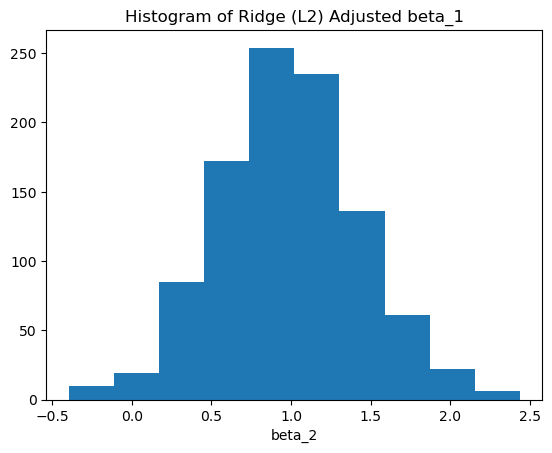

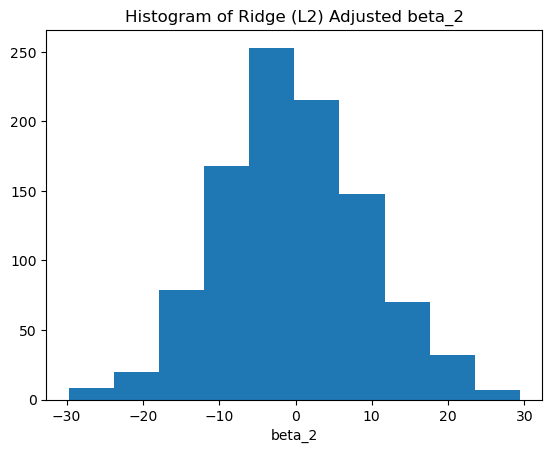

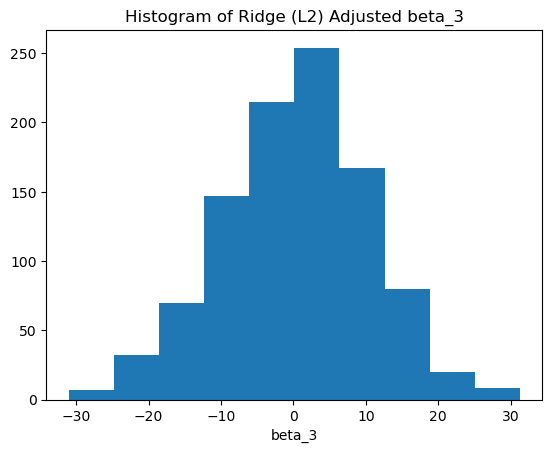

In [12]:
"""
Created on Tue Sep  5 18:33:33 2023

@author: evanshapiro
"""


U = np.array([[1,.999,0.99],[0,1,.95],[0,0,.01]])

C = np.dot(U.T,U)

mu = [0,0,0]
beta = np.array([1,0,0])

mv_norm = sp.stats.multivariate_normal( mean = mu, cov = C)
N  = 100
n = 1000
beta_h = np.zeros([n,3])
for i in range(0,n):
    X = mv_norm.rvs(size = N)
    y = np.dot(X,beta) + np.random.normal(0,1, size = N )
    beta_h[i,:] =  np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))
    

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here 

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here   
plt.figure(2)
plt.hist(beta_h[:,0])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_1')

plt.figure(3)
plt.hist(beta_h[:,1])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_2')


plt.figure(4)
plt.hist(beta_h[:,2])
plt.xlabel('beta_3')
plt.title('Histogram of Ridge (L2) Adjusted beta_3')


### Ridge Trace
To understand the affect that tuning the ridge penalty has on the model we can plot the value of of the model coefficients as a function of $\lambda_2$. These plots are called the ridge trace.

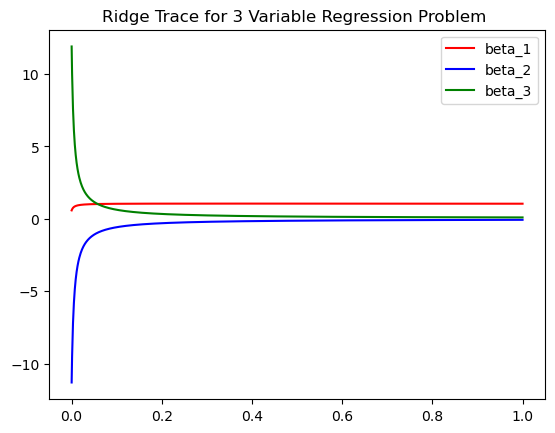

In [7]:


U = np.array([[1,.999,0.99],[0,1,.95],[0,0,.01]])

C = np.dot(U.T,U)
mu = [0,0,0]
beta = np.array([1,0,0])
mv_norm = sp.stats.multivariate_normal( mean = mu, cov = C)
N  = 100
n = 1000

#Implement ridge trace here keeping track of the trace
X = mv_norm.rvs(size = N)
y = np.dot(X,beta) + np.random.normal(0,1, size = N )
 
M = 1000
k = np.linspace(0,1,M)
beta_r = np.zeros([M,3])
for i in range(0,M):
    beta_r[i,:] = np.dot(np.linalg.inv(np.dot(X.T, X) + k[i]*np.identity(C.shape[0])),np.dot(X.T,y))
    
    
plt.figure(1)
plt.plot(k, beta_r[:,0], 'r', label = ' \beta_1')
plt.plot(k, beta_r[:,1], 'b', label = '\beta_2')
plt.plot(k, beta_r[:,2], 'g', label = '\beta_3')
plt.legend(["beta_1", "beta_2", "beta_3"])
plt.title('Ridge Trace for 3 Variable Regression Problem ')

beta_h = np.zeros([n,3])
for i in range(0,n):
    X = mv_norm.rvs(size = N)
    y = np.dot(X,beta) + np.random.normal(0,1, size = N )
    beta_h[i,:] =  np.dot(np.linalg.inv(np.dot(X.T, X) + 0.4*np.identity(C.shape[0])),np.dot(X.T,y))
    




Text(0.5, 1.0, 'Histogram of Ridge (L2) Adjusted beta_3')

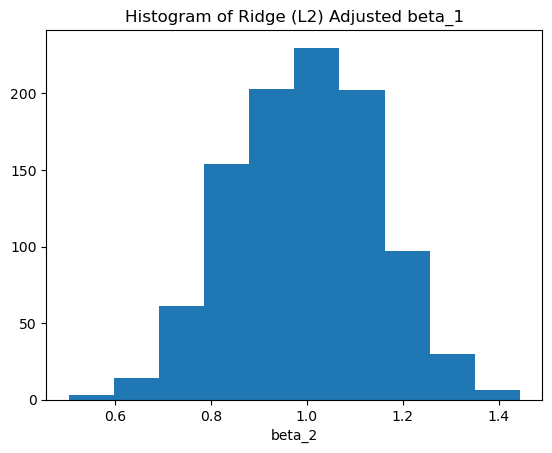

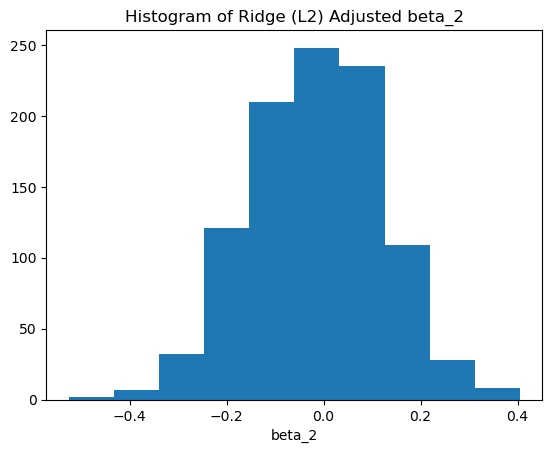

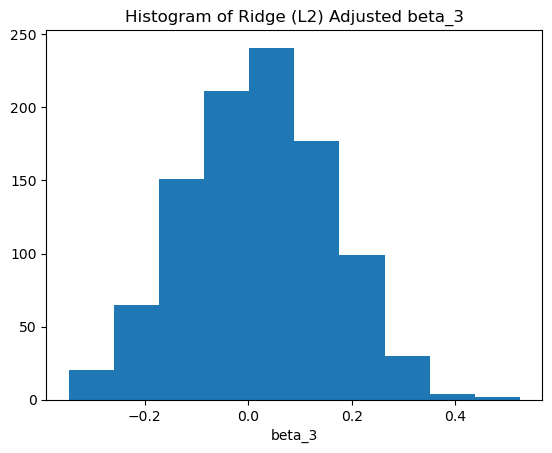

In [8]:

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here   
plt.figure(2)
plt.hist(beta_h[:,0])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_1')

plt.figure(3)
plt.hist(beta_h[:,1])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_2')


plt.figure(4)
plt.hist(beta_h[:,2])
plt.xlabel('beta_3')
plt.title('Histogram of Ridge (L2) Adjusted beta_3')

### The Least Absolute Shrinkage and Selection Operator (LASSO) Regularization
#### Background and Purpose of the Lasso
The Least Absolute Shrinkage and Selection Operator (LASSO) was first named and formally explored in the 1996 paper "Regression Shrinkage and Selection via the Lasso" ([Tibshirani](https://www-jstor-org.aurarialibrary.idm.oclc.org/stable/pdf/2346178.pdf?refreqid=excelsior%3A06345cdd72851bf28a4bedb0ad7b7064&ab_segments=&origin=&initiator=&acceptTC=1))  
The Lasso was was motivated by the nonnegative garotte and by generalized $L^p$ regularization.  
The Lasso was developed to make linear models with a large number of model features intepretable.  
All the coefficients of the OLS and Ridge Regression models are nonzero making them difficult to interpret, and possibly erroneous.  
Lasso achieves an sparse interpretable model by regularizing OLS with an $L_1$ penalty term. 

### The Formal Lasso Regression Problem
Assume the original OLS data and model scenario:  
$(\textbf{x}^i, y^i), i = 1, \cdots, N$.  
$\textbf{x}^i =(x^i_1, \cdots, x^i_p)^T:=$ Predictor Variables  
$y^i:=$ Response Variables  
Assume Data is Standardized:  
$\sum_{i}x^i_j = 0, j = 1, \cdots, N$   
$ \sum_i (x^i_j)^2/N =1, j = 1, \cdots, N$ 
  
Letting $\hat{\beta} =(\hat{\beta}_1, \cdots, \hat{\beta}_p),$ the Lasso estimate $\hat{\beta}(Lasso)$ is defined to be the solution to the convex optimization problem.
\begin{align}
&\text{arg min}_{\beta}\{\sum_{i}(y_i - \sum_j\beta_jx^i_j)^2\}\\
&\text{Subject To} \sum_j |\beta_j| \le t,
\end{align}
where $t\ge 0$ is a tunable hyperparameter.  
If $\hat{\beta}^{(0)}$ is the solution to the OLS problem, and if
$$ \sum_{j=1}^p |\hat{\beta}^{(0)}_j| = q$$
then setting $t < q$ shrinks the coefficients relative to the OLS solution.

### Interpretation in Orthonormal Design Case
In the case of an $ n\times p$ orthonormal design matrix $\textbf{X}$, where $\textbf{X}^T\textbf{X} = \textbf{I},$
the solution to the Lasso coefficients is
\begin{align}
\hat{\beta}(Lasso)_j = \text{sign}(\hat{\beta}_j^0)(|\hat{\beta}_j^0| - \gamma)^+,
\end{align}
where $\gamma$ is determined by the condition $\sum|\hat{\beta}_j| = t.$   
Thus, in the orthonormal case, the $L_1$ regularization acts as a soft thresholding function for the original OLS estimates yielding 0 coefficients. 

### Benefits of the Lasso
1. Yields parsimonious models.
2. Comparable prediction accuracy to Ridge Regression, and other regression techniques.

### Lasso Lagrange Formulation
The Lagrange formulation of the above optimization problem is:
$$ \hat{\beta}(Lasso) =\min_{\beta}\{\sum_{i}(y_i - \sum_j\beta_jx^i_j)^2 + \lambda_1 \sum_{i=1}^p|\beta_i|\}. $$



### Geometric Interpretation of the Lasso
The geometry behind the 0 coefficients can be understood by rewriting $\sum_{i}(y_i - \sum_j\beta_jx^i_j)^2$ in matrix notation as the quadratic function
$$(\beta - \hat{\beta}^{(0)})^TX^TX(\beta - \hat{\beta}^{(0)}),$$
and visualizing the intersection of the elliptic contours with the  constraint region defined by 
$\sum_j |\beta_j| \le t.$  
The solution to the Lasso corresponds to the first point where an elliptic contour intersects the constraint region. If the point of intersection is a corner, then one of the coefficients is identically 0. This can rarely happen with Ridge Regression.

### 2-D Visual Explanation of Lasso Penalization:
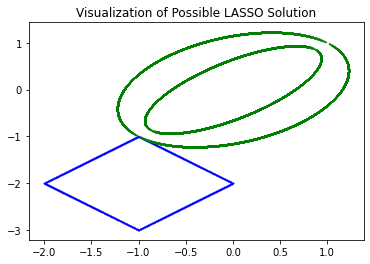


#### Example Problems to Illustrate Uses of Lasso and Issues that may arise with the Lasso.

### Applications of the Lasso
1. Feature selection for more complex analysis. 
2. Dimension Reduction Prior to More Complex Modeling Techniques - Bayesian Networks, Generalized Regression Problems



### The Elastic Net
The Elastic Net was proposed by Hastie and Zhou to deal with some of the limitations of the lasso. [Hastie, T., Zhou, H.](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/B67.2%20(2005)%20301-320%20Zou%20%26%20Hastie.pdf)
### Background & Motivation  
As a refresher, two criteria used to evaluate the quality of a linear model are:  
a. Accuracy of prediction on future, or out-of-sample data. This corresponds to the generalizability of the model, and is usually evaluated using testing data. The ridge does well in this case when data is highly correlated.  
b. Interpretation of the model. Simpler models are generally better. The lasso does well in this case.
#### Lasso Issues
a) If $p>n$ then the lasso selects at most n features, due to the nature of the convex optimization problem. Additionally, the lasso solution is not unique unless the bound on the $L_1$ norm of the coefficients is smaller than a particular value.  
  
b) If there is a group of variables among which the pairwise correlations are very high, then
the lasso tends to select only one variable from the group arbitrarily.
  
c) If $n>p$, and if there are high correlations between predictors, it has been
empirically observed that the prediction performance of the lasso is dominated by ridge
regression.  
  
Both data scenarios a) and b) occur frequently in biological modeling scenarios. In
Hastie and Zhou proposed the following penalized regression problem to extend the lasso to work in scenarios a-b, and improve the predictive accuracy of the lasso in scenario c. 
\begin{align}
\hat{\beta}(\text{lasso}) = (1+\lambda_2)\hat{\beta}
\end{align}
where  
$$
\hat{\beta} = \min_{\beta}||y-X\beta||_2^2\\
\text{subject to} \quad (1-\alpha)\sum_{i=1}^p|\beta_i| + \alpha\sum_{i=1}^p|\beta_i|^2 \le t \quad t \ge 0.
$$
In terms of the previous $L_1$ and $L_2$ tuning parameters  $$\alpha = \frac{\lambda_2}{\lambda_1 + \lambda_2}.$$  

The elastic net is typically presented in its Lagrangian form:  
\begin{align}
\hat{\beta}(enet) &= (1+\lambda_2)\min_{\beta}\mathcal{L}(\lambda_1, \lambda_2, \beta)\\
    &= (1+\lambda_2)\min_{\beta}\{||y-X\beta||_2^2 + \lambda_1\sum_{i=1}^p|\beta_i| + \lambda_2\sum_{i=1}^p|\beta_i|^2\}
\end{align}
  
The factor of $(1+\lambda_2)$ fixes the "double shrinkage" to the coefficients that minimizing the Lagrangian causes, adding unnecessary bias to the solution. Please see [Hastie, T., Zhou, H.](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/B67.2%20(2005)%20301-320%20Zou%20%26%20Hastie.pdf) for more information. 

### Extending the Lasso to $p>n$.
Given data set $(y,X)$ and $(\lambda_1, \lambda_2)$, we can transform this data set a new "artificial" data set:
$$
X^*_{(n+p)\times p} = (1+\lambda_2)^{-1/2}\begin{pmatrix}X\\ \sqrt{\lambda_2}I \end{pmatrix}\\
y^*_{(n+p)} = \begin{pmatrix} y\\ 0 \end{pmatrix}, 
$$
where $I$ is the $p\times p$ identity.  
Letting $\gamma = \frac{\lambda_1}{\sqrt{1+\lambda_2}}$, $\beta^* = \sqrt{1+\lambda_2}\beta$.  
The Lagrangian of the elastic net can be rewritten as
$$
\mathcal{L}(\gamma, \beta^*) = |X^*\beta^* - y^*|^2 + \gamma\sum_{i=1}^p|\beta^*|,
$$
which is a lasso penalized regression function, where the augmented data matrix has rank $p$, and thus can be solved for $p>n$.

### Improved Properties of Elastic Net
1. Extends lasso variable selection  property (sparse modeling) to scenario where $p>n.$
2. Has the ability of keeping groups of variables in the model. For groups of highly correlated variables, does not arbitrarily pick one, and discard others from the group. (Useful in genetic modeling with large groups of highly correlated proteins working together in biological pathways.)
3. Improves the accuracy of the lasso when data is highly correlated.


### The Oracle Property for Model Estimators in Data Adaptive Modeling

The Oracle Property was first introduced in the 1994 paper "Ideal Spatial Adaptation by Wavelet Shrinkage" by [Donoho and Johnstone](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/Donoho-IdealSpatialAdaptation-1994.pdf).  
D & J developed the idea of the Oracle Property around data adaptive methods for fitting an unknown, spatially varying function, $f(t)$ based on stochastic data:
$$y_i = f(t_i) + \epsilon_i, \qquad (i=1,\cdots,n)$$
where $\epsilon \sim N(0,\sigma^2)$, $t_i = i/n$, and $f$ is the unknown function being recovered.  
The goal is to find an estimator $\hat{f}$ of $f$, where the performance of the estimator is measured with the quadratic loss at the sample points. This is motivated by finding an estimator that minimizes the risk function
$$
R(\hat{f},f) = n^{-1}E||\hat{f} - f||_{2,n}^2
$$
The estimators are defined by
$$ \hat{f} = T(y,d(y)),$$
where $T(y,\delta)$ is a reconstruction formula with a spatial smoothing parameter $\delta$, and $d(y)$ is a data-adaptive choice of $\delta$.
### Example
An example of a reconstruction formula would be a piecewise polynomial reconstruction formula, over an interval $I = [0,1],$ where $I$ is partitioned into subintervals $I = (I_1, I_2, \cdots, I_L)$ where the length of each subinterval is dependent on the data, $I_1 = [0, d(y)_1), I_2 = [d(y)_1, d(y)_1 + d(y)_2),\cdots, [d(y)_1+ \cdots + d(y)_{L-1}, d(y)_1+ \cdots + d(y)_{L}]$, where $\sum_{i=1}^L d(y)_i =1$.

$$T_{PP(D)}(y, d(y))(t) = \sum_{l=1}^L\hat{p}_l(t)I_l(t); \qquad \hat{p}_l(t) = \sum_{k=0}a_kt^k.$$


#### Oracle Property Definition
Given an estimator based on a reconstruction formula $\hat{f} = T(y,d(y))$, we say the estimator has the oracle property if it provides the best possible set of data adaptive parameters for fitting the true underlying $f$. Posed in terms of the risk function, the oracle gives us the set of $\delta*$ such that
$$
R(T(y,\delta*),f) = \inf_{\delta}R(T(y,\delta),f).
$$



### Definitions
#### Consistency of an Estimator
#### $\sqrt{n}-$ Consistency of an Estimator

### Adaptive Lasso
In 2001 Fang and Li studied the Oracle Property in the context of statistical regression with nonconcave penalization functions, and in 2006 Zhou studied the Oracle Property of the adaptive Lasso penalization, [Zou, H., 2006](http://users.stat.umn.edu/~zouxx019/Papers/adalasso.pdf) and extended the definition of the Oracle Property to the  penalized regression setting.  
In the 2006 paper, Zhou proved that the lasso has nonignorable bias in estimating the nonzero coefficients, making the lasso an inconsistent estimator of the nonzero model coefficients.  
In the same paper Zhou proposed an updated, weighted version of the lasso with additional regularization conditions, and proved that this updated version of the lasso is a consistent estimator.  
  
To define the oracle property in the context of penalized regression we recall the regression model 
$$y = \beta_0 + \beta_1x_1 + \cdots + \beta_p x_p +\epsilon$$
And define:
$$ \mathcal{A} = \{j:\beta_j \neq 0 \},$$
or the set of indices of the true nonzero coefficients of the regression model. 
Assume $|\mathcal{A}| = p_0 < p.$  
Define $\hat{\mathcal{A}}(lasso)$ as $\hat{\mathcal{A}}(lasso)= \{j:\hat{\beta_j(lasso)} \neq 0\}.$   
Define $\textbf{$\hat{\beta}(\delta)$}$ as an estimator of $\beta$ corresponding to the fitting procedure $\delta$.  
$\delta$ is defined to be an Oracle procedure if, asymptotically, $\hat{\beta}(\delta)$ has the following oracle properties:  
1.  Consistency (convergence in probability) of variable selection: $Pr(\{j: \hat{\beta_j} \neq  0\} = \mathcal{A}) \to 1$ as $n\to \infty$.
2.  Asymptotic normality of the estimator: $\hat{\beta}$: $\sqrt{n}(\hat{\beta}(\delta)_{\mathcal{A}} - \beta_{\mathcal{A}})
\to \mathcal{N}(0, \Sigma)$, where $\Sigma$ is the covariance matrix of the true subset model.  

In [Zou, H., 2006](http://users.stat.umn.edu/~zouxx019/Papers/adalasso.pdf) Zhou showed that the Lasso is not generally a consistent estimator of the true set of model coefficients. Which means that as the training size increases, the probability that  cannot expect the Lasso to identify $\mathcal{A}$.  
Zhou developed the data adaptive Lasso, with the following objective function
$$\beta(alasso) = \min_{\beta} ||y-X\beta||_2^2 + \lambda_1\sum_{i=1}^p w_i|\beta_i|,$$
where the $w_i$ are data adaptive coefficients.
Using the coefficients as derived from standard OLS, $\beta(OLS)$ Zhou defined $w_j = |\beta_j(OLS)|^{-\gamma},$ for $ j = 1, \cdots, p$ and where $\gamma >1$, and showed that, given these weights, and the following regularity conditions, that $\beta(alasso)$ has the oracle property.  

Pause to explain intuitvely why this works.



### The Adaptive Elastic Net
In 2009, Zhou and Zhang, [Zou, H., Zhang, H.H. 2009](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/nihms114303.pdf), analyzed the Elastic Net, and showed that the standard elastic net is an inconsistent estimator for $\mathcal{A}$, the true set of nonzero model coefficients. Building on the work of the Adaptive Lasso, they developed the Adaptive Elastic Net (AENET). In their paper, on "Adaptive Elastic Net with a Diverging Number of Parameters", Zhou and Zhang showed (AENET) has the following properties:
1. Consistency in feature selection.
2. Stability in model coefficients, and accuracy in magnitude.
3. $\sqrt{n}-$consistency of estimator (Sample error converges to $\mathcal{N}(0,C)$).  
4. Maintains the nice properties of the elastic net.

Zhou and Zhang studied the behavior the adaptive elastic net as the number of parameters grows with the sample size, which represents the real world. As more data become available more features and information can be incorporated into predictive models. The question is, how well do penalized regression models perform under these conditions? 

### Adaptive Elastic Net Algorithm:
1. Setup a grid (G) of $L_1, L_2$ coefficients. ($G\in (0,1]\times \mathbb{R}$) 
2. Solve for $\beta(enet)$ and $\lambda_2$ by minimizing the original Elastic Net cost function over $\beta$ for all $(\lambda_1,\lambda_2) \in G$.
3. Solve for adaptive weights: $w_j = |\beta_j(enet)|^{-\gamma}$. $\gamma >0$, and is related to the rate at which the parameters grow with sample size.
4. Minimize the following Adaptive Elastic Net cost function:
$$\beta(aenet) =(1+\lambda_2)\min_{\beta} \{||y-X\beta||_2^2 + \lambda_1^*\sum_{i=1}^p w_i|\beta_i| +\lambda_2\sum_{i=1}^p w_i|\beta_i|^2\},$$
where we tune over $\lambda_1^*.$  

### Regularization Conditions
The following regularity conditions guarantee that the solution to the Adaptive Elastic Net has the above desired properties.
1. (X^TX) is somewhat well conditioned. Let $\lambda_{min}(M)$ be the minimum eigenvalue of the matrix M and let $\lambda_{max}(M)$ be the maximum eigenvalue of M. The we assume there exists real $b,B$ such that 
$$ b\le \lambda_{min}(X^TX) \le \lambda_{max}(X^TX) \le B$$

2. $\lim_{n \to \infty} \frac{\max_{i=1, \cdots, n}\sum_{j=1}^p x_{i,j}^2}{n} = 0$
3. E[$|\epsilon|^{\delta + 2}]< \infty$ for some $\delta>0$
4. $\lim_{n\to \infty}\frac{log(p)}{log(n)} = \nu$ for $0 \le \nu <1.$
5. $\lim_{n \to \infty} \frac{\lambda_1^*}{\sqrt{n}} = 0$, $\lim_{n \to \infty} \frac{\lambda_1^*}{\sqrt{n}}n^{\frac{(1-\nu)(1+\gamma) -1}{2}} = \infty$
6. $\lim_{n\to \infty}\frac{\lambda_2}{\sqrt{n}}\sqrt{\sum_{j\in \mathcal{A}}\beta_j^2}$,   $\lim_{n \to \infty}min(\frac{n}{\lambda_1\sqrt{p}},(\frac{\sqrt{n}}{\lambda_1^*\sqrt{p}})^{1/\gamma})(\min_{j\in \mathcal{A}}(\beta^*_j)$

For proofs on how these constraints lead to the consistency and asymptotic normality of $\hat{\beta}(aenet)$ refer to the appendices of 
[Zou, H., Zhang, H.H. 2009](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/nihms114303.pdf)


## Methods 

### CVXPy
All adaptive methods were solved using CVXPy.  
CVXPy is a convex optimization python package that allows you to construct custom loss functions and penalization functions, as well solve more complex optimization problems than penalized regression. For more information, click [here](https://www.cvxpy.org/). To learn more about convex optimization, take Dr. Emily Speakman's convex optimization class. 

#### Example: Implementing Adaptive Methods in Python
To illustrate the difference in the consistency of the various regression methods we consider the following example.
Generating data from the following linear model 
$$y = x^T\beta + \epsilon$$  
$x \in \mathbb{R}^p$  
$x\sim\mathcal{N}(0, \Sigma).$  
$\Sigma_{j,k} = \rho^{|j-k|}, \quad 1\le j \le k \le p.$  
$\rho = 0.75$    
$\epsilon \sim \mathcal{N}(0,1)$   
$n = 100,200,400$  
$p=p_n = [4n^{1/2}] - 5$, $p_{100} = 35, p_{200} = 51, p_{400} = 75$  
Letting $\textbf{1}_m/\textbf{0}_m$ denote an $m-$vector of 1s/0s.   
$\beta^* = (3*\textbf{1}_q, 2*\textbf{1}_q, 2*\textbf{1}_q, \textbf{0}_{p-3q})^T,$ so $|\mathcal{A}| = 3q,$ $q = [p_n/9].$  
Number of Sample Iterates:= N = 100  
Grid-Search & 5 Fold Cross Validation is to select for $\lambda_1^*, \Lambda_2$, as well as model selectio
### Fitting & Evaluating Performance of Models
1. Fit lasso, elastic net, and OLS for 100 iterates, for the 3 different sample sized sample sizes.
2. Calculate adaptive weights for the adaptive lasso and adaptive elastic net using the results from OLS and elastic-net.
3. Use the adaptive weights to fit the adaptive lasso and elastic net for 100 iterates.
4. Compare the number of incorrect nonzero coefficients for the lasso, elastic net, adaptive-lasso, and adaptive elastic-net.
5. Compare the normalized MSE of the estimates of $\beta$, $MSE_n = \frac{(\beta - \hat{\beta})^T(\beta - \hat{\beta})}{\beta^T\beta}$



In [5]:
#Setting random seed for reproducibility
np.random.seed(42)
#Zhou & Zhang Numerical Example From "On the Adaptive Elastic-Net With a 
#Diverging Number of Parameters" 2006
#Adaptive ENet Cost function := 
# min_{beta}|| y -Xbeta||_2^2 + lambda_2||beta||_2^2 + lambda_1*sum_j\hat{w_j}|beta_j|
# lambda_2 = solution for lamdba_2 from original elastic net
# lambda_1* := New hyper parameter, solved ofr using cross validation <\infty (bounded)
#\hat{w}_j:= (|beta(enet)_j|)^(-gamma), or (|beta(enet)_j| + n)^(-gamma) 
#to avoid divison by 0
# n:= number of observations
# p_n:= number of parameters (increase as n increases)
#p_n is O(n^(nu))
#nu := lim_{n\to \infty} log(p)/log(n) 0 =< nu =< 1
#p_n = [4n^(1/2)] - 5
# n =100
#nu = 1/2
#gamma := hyper-parameter, constraint gamma > 2nu/(1-nu)
#gamma = 2nu/(1-nu) + 1 for convenience 
#A := set of indices for nonzero coefficients from the elastic net
#Cov := Covariance Matrix, rho^(|j-k|), rho = 0.5
#Sklearn uses different weights for norms in the enet cost function:
#alpha := Lambda_1 + Lambda_2; l1_ratio = Lambda_1/(lambda_1 + lambda_2)
#lambda_1 = alpha(l1_ratio); lambda_2 = alpha*(1-l1_ratio)

def check_sym(Cov, pn):
    for i in range(0, pn):
        for j in range(0,pn):
            print(Cov[i,j] == Cov[j,i])

#N:= Number of samples collected, not sample size
N = 100 #Number of replicates
n = 100
#Adaptive Elastic Net Parameters
pn = int(4*n**(1/2) -5)
q = int(round(pn/9))
nu = 1/2
gamma = 2*nu/(1-nu) + 1

Cov = np.zeros((pn, pn ))
rho = 0.75

y_sigma = 1

for i in range(0, pn):
    for j in range(0,pn):
        Cov[i,j] = rho**(np.abs(i-j))

mu = np.zeros(pn)
mv_norm = sp.stats.multivariate_normal( mean = mu, cov = Cov)

beta_h = np.zeros(pn)
beta_h_nz_1 = np.ones(q)*3
beta_h_nz_2 = np.ones(q*2)*2
beta_h[0:q] = beta_h_nz_1
beta_h[q:3*q] = beta_h_nz_2

beta_h_norm = np.dot(beta_h, beta_h)

l1_r = np.linspace(0.02, 0.9, 20)
alpha = np.logspace(-2, 1, 20)
search_dict = {'l1_ratio': l1_r, 'alpha': alpha}
las_dict = {'alpha': alpha}


#Initializing data arrays
X = mv_norm.rvs(size = n*N)
Y = np.zeros((n,N))

#Implement OLS, Lasso, and ENet  here for comparison

beta_arr = np.zeros((N,pn,3))
ad_w_arr = np.zeros((N,pn,2))

hist_arr_ic = np.zeros((N,2))
beta_mse = np.zeros((N,2))

alpha = np.zeros(N)
l1_ratio = np.zeros(N)
lambda_2 = np.zeros(N)

for i in range(0,N):
    Y[:,i] = np.dot(X[i*n:(i+1)*n,:],beta_h) + np.random.normal(0,y_sigma, size = n )
    ENet = ElasticNet()
    Las = Lasso()
    
    OLS = LinearRegression()
    reg_1 =  GridSearchCV(ENet, search_dict)
    reg_2 = GridSearchCV(Las, las_dict)
    
    OLS.fit(X[i*n:(i+1)*n,:],Y[:,i])
    reg_1.fit(X[i*n:(i+1)*n,:],Y[:,i])
    reg_2.fit(X[i*n:(i+1)*n,:],Y[:,i])
    
    alpha[i]= reg_1.best_params_['alpha']
    l1_ratio[i] = reg_1.best_params_['l1_ratio']
    lambda_2[i] = alpha[i]*(1-l1_ratio[i])

    beta_arr[i,:,0] = reg_1.best_estimator_.coef_
    beta_arr[i,:,1] = reg_2.best_estimator_.coef_
    beta_arr[i,:,2] = OLS.coef_
    
    ad_w_arr[i,:,0] = (np.abs(reg_1.best_estimator_.coef_) + 1/n)**(-gamma)
    ad_w_arr[i,:,1] = np.abs(OLS.coef_)**(-gamma)
    
    beta_mse[i,0] = 1/beta_h_norm*np.dot(beta_h - reg_1.best_estimator_.coef_, beta_h - reg_1.best_estimator_.coef_)
    beta_mse[i,1] = 1/beta_h_norm*np.dot(beta_h - reg_2.best_estimator_.coef_, beta_h - reg_2.best_estimator_.coef_)
    
    hist_arr_ic[i,0] = np.sum(np.abs(beta_h.astype(bool).astype(int) - reg_1.best_estimator_.coef_.astype(bool).astype(int)))
    hist_arr_ic[i,1] = np.sum(np.abs(beta_h.astype(bool).astype(int) - reg_2.best_estimator_.coef_.astype(bool).astype(int)))

In [7]:
import cvxpy as cp
import random
import numpy as np
def train_err_plots(lambda_1, data):
    plt.plot(lambda_1, data)
    plt.title('Training Error vs L1 Regularization Coeff.')
    plt.xlabel('L1 Regularization Coeff.')
    plt.ylabel('MSE')
    
def tts(n, cv_n):
    cv_idx = np.zeros((cv_n, int(n/cv_n)))
    idx_list = np.arange(0,n)
    for i in range(0, cv_n):
        cv_idx[i,:] = random.sample(sorted(idx_list),int(n/cv_n))
        idx_list = np.setdiff1d(idx_list, cv_idx[i,:])
    return cv_idx.astype(int)
        
    

def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2


#aenet objective function takes weights from a lasso and uses them to weight
# the coefficients in the regularization function 

#Weights \hat{w}_j :=(|\hat{beta}_j(enet)| +1/n)^{-\gamma}; gamma \ge 0
#lambda_2:= lambda_2 from original elastic-net 
#lambda_1*:= New hyperparameter that is determined via CV.

def lasso_objective_fn(X, Y, beta, lambd_1, lambd_2, verbose = True):
    return loss_fn(X, Y, beta) + lambd_1 * cp.norm1(beta)

def enet_objective_fn(X, Y, beta, lambd_1, lambd_2, verbose = True):
    return loss_fn(X, Y, beta) + lambd_1 * cp.norm1(beta) + lambd_2*cp.norm2(beta)


def alasso_objective_fn(X, Y, beta, lambd_1,  weights, verbose = True):
    return loss_fn(X, Y, beta) + lambd_1 * cp.norm1(cp.multiply(weights,beta))

def aenet_objective_fn(X, Y, beta, lambd_1, lambd_2, weights, verbose = True):
    return loss_fn(X, Y, beta) + lambd_1 * cp.norm1(cp.multiply(weights,beta)) + lambd_2*cp.norm2(beta)




def mse(X, Y, beta):
    return loss_fn(X, Y, beta).value



def enet_cv_script(N,n, cv_n, n_lmbda_1, n_lmbda_2, pn, X, Y, lambda_2, ad_w_arr, meth = 'aenet'):
    lambda_2 = cp.Parameter(nonneg=True)
    lambda_values_2 = np.linspace(0.01, 10, n_lmbda_2)
    
    beta = cp.Variable(pn)
    lambda_1 = cp.Parameter(nonneg=True)
    
    lambda_values_1 = np.logspace(-8, 0, n_lmbda_1)
    
    train_errors = np.zeros((cv_n, n_lmbda_1, N))
    test_errors = np.zeros((cv_n, n_lmbda_1, N))
    train_n_errors = np.zeros((cv_n, n_lmbda_1, N))
    test_n_errors = np.zeros((cv_n, n_lmbda_1, N))
    beta_values = np.zeros((cv_n, n_lmbda_1, N))
    
    train_f = np.zeros((N, n_lmbda_1))
    test_f = np.zeros((N, n_lmbda_1))
    train_f_n = np.zeros((N, n_lmbda_1))
    test_f_n = np.zeros((N, n_lmbda_1))
    
    beta_arr = np.zeros((N, pn))
    lambda_arr = []
    mse_arr = []
    mse_n_arr = []
    
    #Cross-Validation to prevent overtraining the model
    for i in range(0, N):
    
        idx_arr = tts(n, cv_n)
        X_init = X[i*n:(i+1)*n,:]
        Y_init = Y[:,i]
        
        for j in range(0, cv_n):
            test_idx = idx_arr[j,:]
            
            idx_set  = np.arange(0, cv_n)
            idx_set =  np.setdiff1d(idx_set, j)
            train_idx = idx_arr[idx_set,:].flatten()
            
            X_train = X_init[train_idx,:]
            Y_train = Y_init[train_idx]
            Y_train_norm = np.dot(Y_train, Y_train)
            
            X_test  = X_init[test_idx,:]
            Y_test = Y_init[test_idx]
            Y_test_norm = np.dot(Y_test, Y_test)
            
            
            
            problem = cp.Problem(cp.Minimize(enet_objective_fn(X_train, Y_train, beta, lambda_1, lambda_2)))
            #Compare solution to solution where weights for coefficients that were 0 
            #in ENet are also zero. 
            train_err_int = []
            test_err_int = []
            beta_val_int = []
            
            train_err_n_int = []
            test_err_n_int = []
            
            for v_1 in lambda_values_1:
                lambda_1.value = v_1
                for v_2 in lambda_values_2:
                    lambda_2.value = v_2
                    problem.solve(solver = 'ECOS')
                    beta_enet = (1+v_2)*beta
                    train_err_int.append(mse(X_train, Y_train, beta_enet))
                    test_err_int.append(mse(X_test, Y_test, beta_enet))
                    
                    train_err_n_int.append(1/Y_train_norm*mse(X_train, Y_train, beta_enet))
                    test_err_n_int.append(1/Y_test_norm*mse(X_test, Y_test, beta_enet))
                
                    
                    #beta_val_int.append(beta.value)
                

            
            
            train_errors[j,:,i] = train_err_int
            test_errors[j,:,i] = test_err_int
            
            train_n_errors[j,:,i] = train_err_n_int
            test_n_errors[j,:,i] = test_err_n_int
            
        #Calculate Cross Validation test error for each lambda_1 value   
        test_f[i,:] = 1/X_init.shape[0]*np.sum(test_errors[:,:,i], axis = 0)
        test_f_n[i,:] = np.sum(test_n_errors[:,:,i], axis = 0)
        
        mse_arr.append(np.min(test_f[i,:]))
        mse_n_arr.append(np.min(test_f_n[i,:]))
        
        #Find lambda_1 value for minimum cross validation errorusing early stopping criteria
        idx_temp = np.where(test_f[i,:] == np.min(test_f[i,:]))[0]
        lambda_arr.append(lambda_values_1[idx_temp])
    
    return test_f, lambda_arr, mse_arr, mse_n_arr
    
    

#Adaptive Method Cross Validation Script
#Returns:
#1) [N_replicates x n_lambda_1] Matrix of  Cross validation error for all lambda_1 values and all data replicates 
#2) [N_replicates] vector of Lambda_1 value that minimizes cross validation error for all replicates
#3) [N_replicates] vector of MSE for lambda_1 value  that minimizes cross validation error for all replicates.
#Runs cross validation on ALasso, AENet, and, despite the name, Lasso.
#N:= Number of replicates
#n:= Sample size
#cv_n:= Cross Validation Number
#lambda_values_1:= Set of L_1 penalty coefficient values to tune over  
#pn = number of model parameters
#X:= Input data
#Y:= Output Data
#lambda_2 := Fixed set of L_2 penalty terms - Do not tune over this. Use values
#from previously trained elastic net.
#ad_w_arr:= Array of adapative weights derived from first step of modeling procedure.
#If using adaptive lasso, weights should come from OLS. If using adaptive ealstic net, 
#weights are derived from ealstic net.
#meth:= default is adaptive elastic net 
def ada_meth_cv_script(N,n, cv_n, lambda_values_1, pn, X, Y, lambda_2, ad_w_arr, meth = 'aenet'):
    
    beta = cp.Variable(pn)
    lambda_1 = cp.Parameter(nonneg=True)
    
    n_lmbda_1 = lambda_values_1.shape[0]
    
    train_errors = np.zeros((cv_n, n_lmbda_1, N))
    test_errors = np.zeros((cv_n, n_lmbda_1, N))
    train_n_errors = np.zeros((cv_n, n_lmbda_1, N))
    test_n_errors = np.zeros((cv_n, n_lmbda_1, N))
    
    beta_values = np.zeros((cv_n, n_lmbda_1, N))
    
    train_f = np.zeros((N, n_lmbda_1))
    test_f = np.zeros((N, n_lmbda_1))
    train_f_n = np.zeros((N, n_lmbda_1))
    test_f_n = np.zeros((N, n_lmbda_1))
    
    beta_arr = np.zeros((N, pn))
    lambda_arr = []
    mse_arr = []
    mse_n_arr = []
    
    #Cross-Validation to prevent overtraining the model
    for i in range(0, N):
        
        idx_arr = tts(n, cv_n)
        X_init = X[i*n:(i+1)*n,:]
        Y_init = Y[:,i]
        
        for j in range(0, cv_n):
            test_idx = idx_arr[j,:]
            
            idx_set  = np.arange(0, cv_n)
            idx_set =  np.setdiff1d(idx_set, j)
            train_idx = idx_arr[idx_set,:].flatten()
            
            X_train = X_init[train_idx,:]
            Y_train = Y_init[train_idx]
            Y_train_norm = np.dot(Y_train, Y_train)
            
            X_test  = X_init[test_idx,:]
            Y_test = Y_init[test_idx]
            Y_test_norm = np.dot(Y_test - np.mean(Y_test), Y_test - np.mean(Y_test))
            # print(np.mean(Y_test), Y_test, Y_test - np.mean(Y_test) )
            
            #Compare solution to solution where weights for coefficients that were 0 
            #in ENet are also zero. 
            train_err_int = []
            test_err_int = []
            beta_val_int = []
            
            train_err_n_int = []
            test_err_n_int = []
            
            if meth == 'lasso':
                problem = cp.Problem(cp.Minimize(lasso_objective_fn(X_train, Y_train, beta, lambda_1)))
            if meth == 'aenet':
                problem = cp.Problem(cp.Minimize(aenet_objective_fn(X_train, Y_train, beta, lambda_1, lambda_2[i], ad_w_arr[i,:])))
            if meth == 'alasso':
                problem = cp.Problem(cp.Minimize(alasso_objective_fn(X_train, Y_train, beta, lambda_1, ad_w_arr[i,:])))

            #Compare solution to solution where weights for coefficients that were 0 
            #in ENet are also zero. 
            for v in lambda_values_1:
                lambda_1.value = v
                problem.solve(solver = 'ECOS')
                if meth == 'aenet':
                    beta_enet = (1+lambda_2[i])*beta
                    train_err_int.append(mse(X_train, Y_train, beta_enet))
                    test_err_int.append(mse(X_test, Y_test, beta_enet))
                    
                    train_err_n_int.append(1/Y_train_norm*mse(X_train, Y_train, beta_enet))
                    test_err_n_int.append(1/Y_test_norm*mse(X_test, Y_test, beta_enet))
                else:
                    train_err_int.append(mse(X_train, Y_train, beta))
                    test_err_int.append(mse(X_test, Y_test, beta))
                    
                    train_err_n_int.append(1/Y_train_norm*mse(X_train, Y_train, beta))
                    test_err_n_int.append(1/Y_test_norm*mse(X_test, Y_test, beta))
                    
            train_errors[j,:,i] = train_err_int
            test_errors[j,:,i] = test_err_int
            
            train_n_errors[j,:,i] = train_err_n_int
            test_n_errors[j,:,i] = test_err_n_int
            
            
            
        #Calculate Cross Validation test error for each lambda_1 value   
        test_f[i,:] = 1/X_init.shape[0]*np.sum(test_errors[:,:,i], axis = 0)
        test_f_n[i,:] = np.sum(test_n_errors[:,:,i], axis = 0)
        mse_arr.append(np.min(test_f[i,:]))
        mse_n_arr.append(np.min(test_f_n[i,:]))
        
        #Find lambda_1 value for minimum cross validation errorusing early stopping criteria
        idx_temp = np.where(test_f[i,:] == np.min(test_f[i,:]))[0]
        lambda_arr.append(lambda_values_1[idx_temp])
    
    return test_f, lambda_arr, mse_arr, mse_n_arr

def model_test(N, n, lambda_1, pn, X, Y, lambda_2, ad_w, meth, beta_h):
    beta = cp.Variable(pn)
    #lambda_1_p = cp.Parameter(nonneg=True)
    beta_arr = np.zeros((N, pn))
    beta_ic = np.zeros(N)
    beta_mse_n = np.zeros(N)
    beta_dict = {}
    beta_h_norm = np.dot(beta_h, beta_h)
    for i in range(0,N):
        X_train = X[i*n:(i+1)*n,:]
        Y_train = Y[:,i]       
        if meth == 'aenet':
            problem = cp.Problem(cp.Minimize(aenet_objective_fn(X_train, Y_train, beta, lambda_1[i][0], lambda_2[i], ad_w[i,:])))
            problem.solve()
        if meth == 'alasso':
            problem = cp.Problem(cp.Minimize(alasso_objective_fn(X_train, Y_train, beta, lambda_1[i][0], ad_w[i,:])))
            problem.solve()
        for j in range(0, pn):
            if beta.value[j] < 1E-9:
                beta_arr[i,j] = 0
            else:
                if meth == 'aenet':
                    beta_arr[i,j] = (1+lambda_2[i]/n)*beta.value[j]
                if meth == 'alasso':
                    beta_arr[i,j] =  beta.value[j]
        beta_ic[i] = np.sum(np.abs(beta_h.astype(bool).astype(int) - beta_arr[i,:].astype(bool).astype(int)))
        beta_mse_n[i] = 1/beta_h_norm*np.dot(beta_h - beta_arr[i,:], beta_h - beta_arr[i,:])
        
    beta_dict['opt_beta_arr'] = beta_arr
    beta_dict['n_beta_ic'] = beta_ic
    beta_dict['beta_mse_n'] = beta_mse_n
 
    return beta_dict



In [8]:
cv_n = 5
n_lmbda_1 = 10
n_lmbda_2 = 1
lambda_values_1 = np.logspace(-8, 0, n_lmbda_1)

ad_w = ad_w_arr[:,:,0]
meth = 'aenet'
#Number of replicates
#If not running bootstrapping set to 1
N = 100
#Sample Size
n = 100
# test_f_enet_2, lambda_arr_enet_2, mse_arr_enet_2 = ada_meth_cv_script(N, n, cv_n, n_lmbda, pn, X, Y, lambda_2, ad_w, meth)
# beta_dict_enet_2 = model_test(N, n, lambda_arr, pn, X, Y, lambda_2, ad_w, meth, beta_h)
test_f_aenet_1, lambda_arr_aenet_1, mse_arr_aenet_1, mse_n_arr_aenet_1 = ada_meth_cv_script(N, n, cv_n, lambda_values_1, pn, X, Y, lambda_2, ad_w, meth)
beta_dict_aenet_1 = model_test(N, n, lambda_arr_aenet_1, pn, X, Y, lambda_2, ad_w, meth, beta_h)

/Users/evanshapiro/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [9]:
cv_n = 5
n_lmbda_1 = 10
n_lmbda_2 = 1
lambda_values_1 = np.logspace(-8, 0, n_lmbda_1)

ad_w = ad_w_arr[:,:,0]
meth = 'alasso'
#Number of replicates
#If not running bootstrapping set to 1
N = 100
#Sample Size
n = 100
# test_f_enet_2, lambda_arr_enet_2, mse_arr_enet_2 = ada_meth_cv_script(N, n, cv_n, n_lmbda, pn, X, Y, lambda_2, ad_w, meth)
# beta_dict_enet_2 = model_test(N, n, lambda_arr, pn, X, Y, lambda_2, ad_w, meth, beta_h)
test_f_alasso_1, lambda_arr_lasso_1, mse_arr_lasoo_1, mse_n_arr_alasso_1 = ada_meth_cv_script(N, n, cv_n, lambda_values_1, pn, X, Y, lambda_2, ad_w, meth)
beta_dict_alasso_1 = model_test(N, n, lambda_arr_aenet_1, pn, X, Y, lambda_2, ad_w, meth, beta_h)

Text(0.5, 1.0, 'Histogram of # of Incorrect Nonzero Coefficients in Lasso (N=100), n = 100')

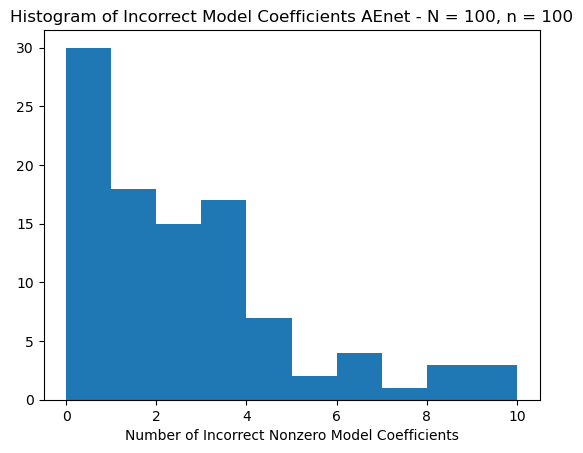

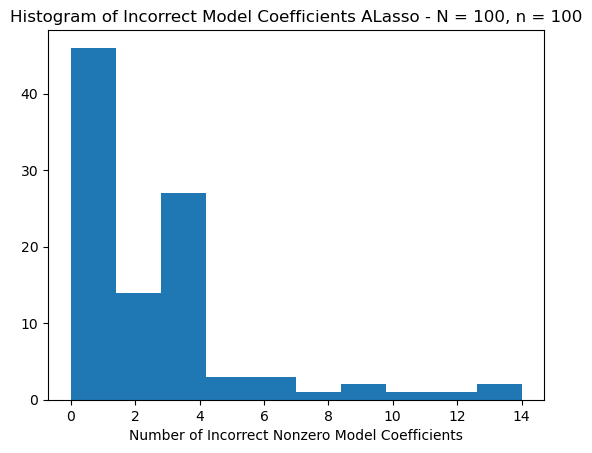

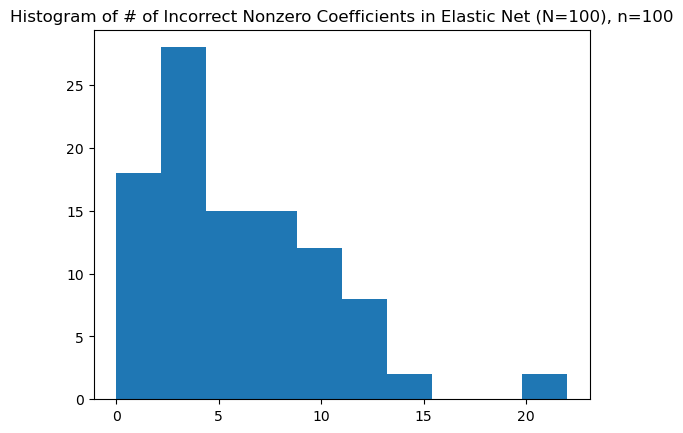

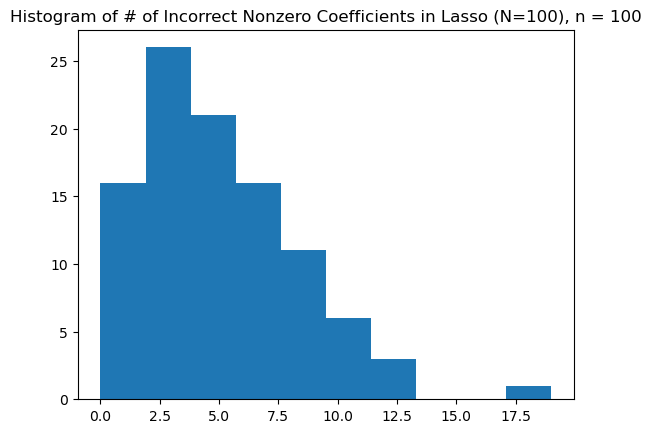

In [10]:
plt.figure(0)
plt.hist(beta_dict_aenet_1['n_beta_ic'])
plt.xlabel('Number of Incorrect Nonzero Model Coefficients')
plt.title('Histogram of Incorrect Model Coefficients AEnet - N = 100, n = 100')

plt.figure(1)
plt.hist(beta_dict_alasso_1['n_beta_ic'])
plt.xlabel('Number of Incorrect Nonzero Model Coefficients')
plt.title('Histogram of Incorrect Model Coefficients ALasso - N = 100, n = 100')


plt.figure(2)
plt.hist(hist_arr_ic[:,0], label = 'ENet')
plt.title('Histogram of # of Incorrect Nonzero Coefficients in Elastic Net (N=100), n=100')

plt.figure(3)
plt.hist(hist_arr_ic[:,1], label = 'Lasso')
#plt.legend()
plt.title('Histogram of # of Incorrect Nonzero Coefficients in Lasso (N=100), n = 100')

### Results from Numerical Experiment
Case 1: n = 100
\begin{matrix}
                           & Lasso  &Enet & ALasso & AEnet\\
Mean NIC                   & 4.7      &6.10      &3.49    &2.33 \\
 St. Dev. NIC              & 3.2      &4.4       &2.92    &2.75 \\
Mean Normalized MSE[\beta] & 0.009    &0.0083    &0.001   &0.009\\
St. Dev.                   & 0.0045   &0.0040    &0.0058 &0.0049\\
\end{matrix}

Case 2: n = 200
\begin{matrix}
                           & Lasso  & Enet & ALasso & AEnet\\
Mean NIC                   & 6.44    & 7.49    &2.72  & 2.53 \\
 St. Dev. NIC & 3.2        & 3.39    & 3.59    &2.34  &1.89 \\
Mean Normalized MSE[\beta] &         &         &0.004 &0.004\\
St. Dev.                   &         &         &0.002 & 0.002\\
\end{matrix}

Case 3: n = 400
\begin{matrix}
                           & Lasso  & Enet & ALasso & AEnet\\
Mean NIC                   & 7.55    & 9.38    & 4.18   & 4.28 \\
 St. Dev. NIC              & 4.6     & 4.8     & 5.5    & 5.2 \\
Mean Normalized MSE[\beta] & 0.0018   & 0.0017  & 0.0019& 0.002\\
St. Dev.                   & 5.8E-04  & 5.6E-4  & 6E-4  & 6E-4\\
\end{matrix}


Conclusion:  
Still have a lot to learn. 
Adaptive penalized methods provide feature selection methods that are robust in high-dimensional data scenarios, with a noisy feature space, and a high-degree of correlation.